## RandomForestRegressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')


In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,10.1,16.1,6.1,1022.7,54.0,15.4,1.3,11.1,284.795833
1,10.9,18.3,4.4,1019.2,42.0,16.1,0.6,7.6,219.720833
2,11.3,21.7,3.9,1018.4,39.0,16.1,0.2,5.4,182.187500
3,12.3,20.6,6.7,1016.9,52.0,16.1,2.2,13.0,154.037500
4,12.7,22.8,6.1,1017.2,53.0,16.1,0.9,7.6,223.208333


<AxesSubplot:>

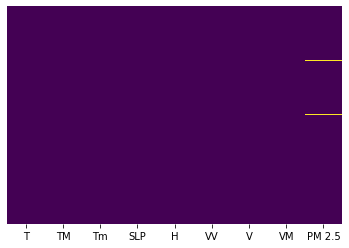

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
734,False,False,False,False,False,False,False,False
735,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
734    False
735    False
736    False
737    False
738    False
Name: PM 2.5, Length: 736, dtype: bool

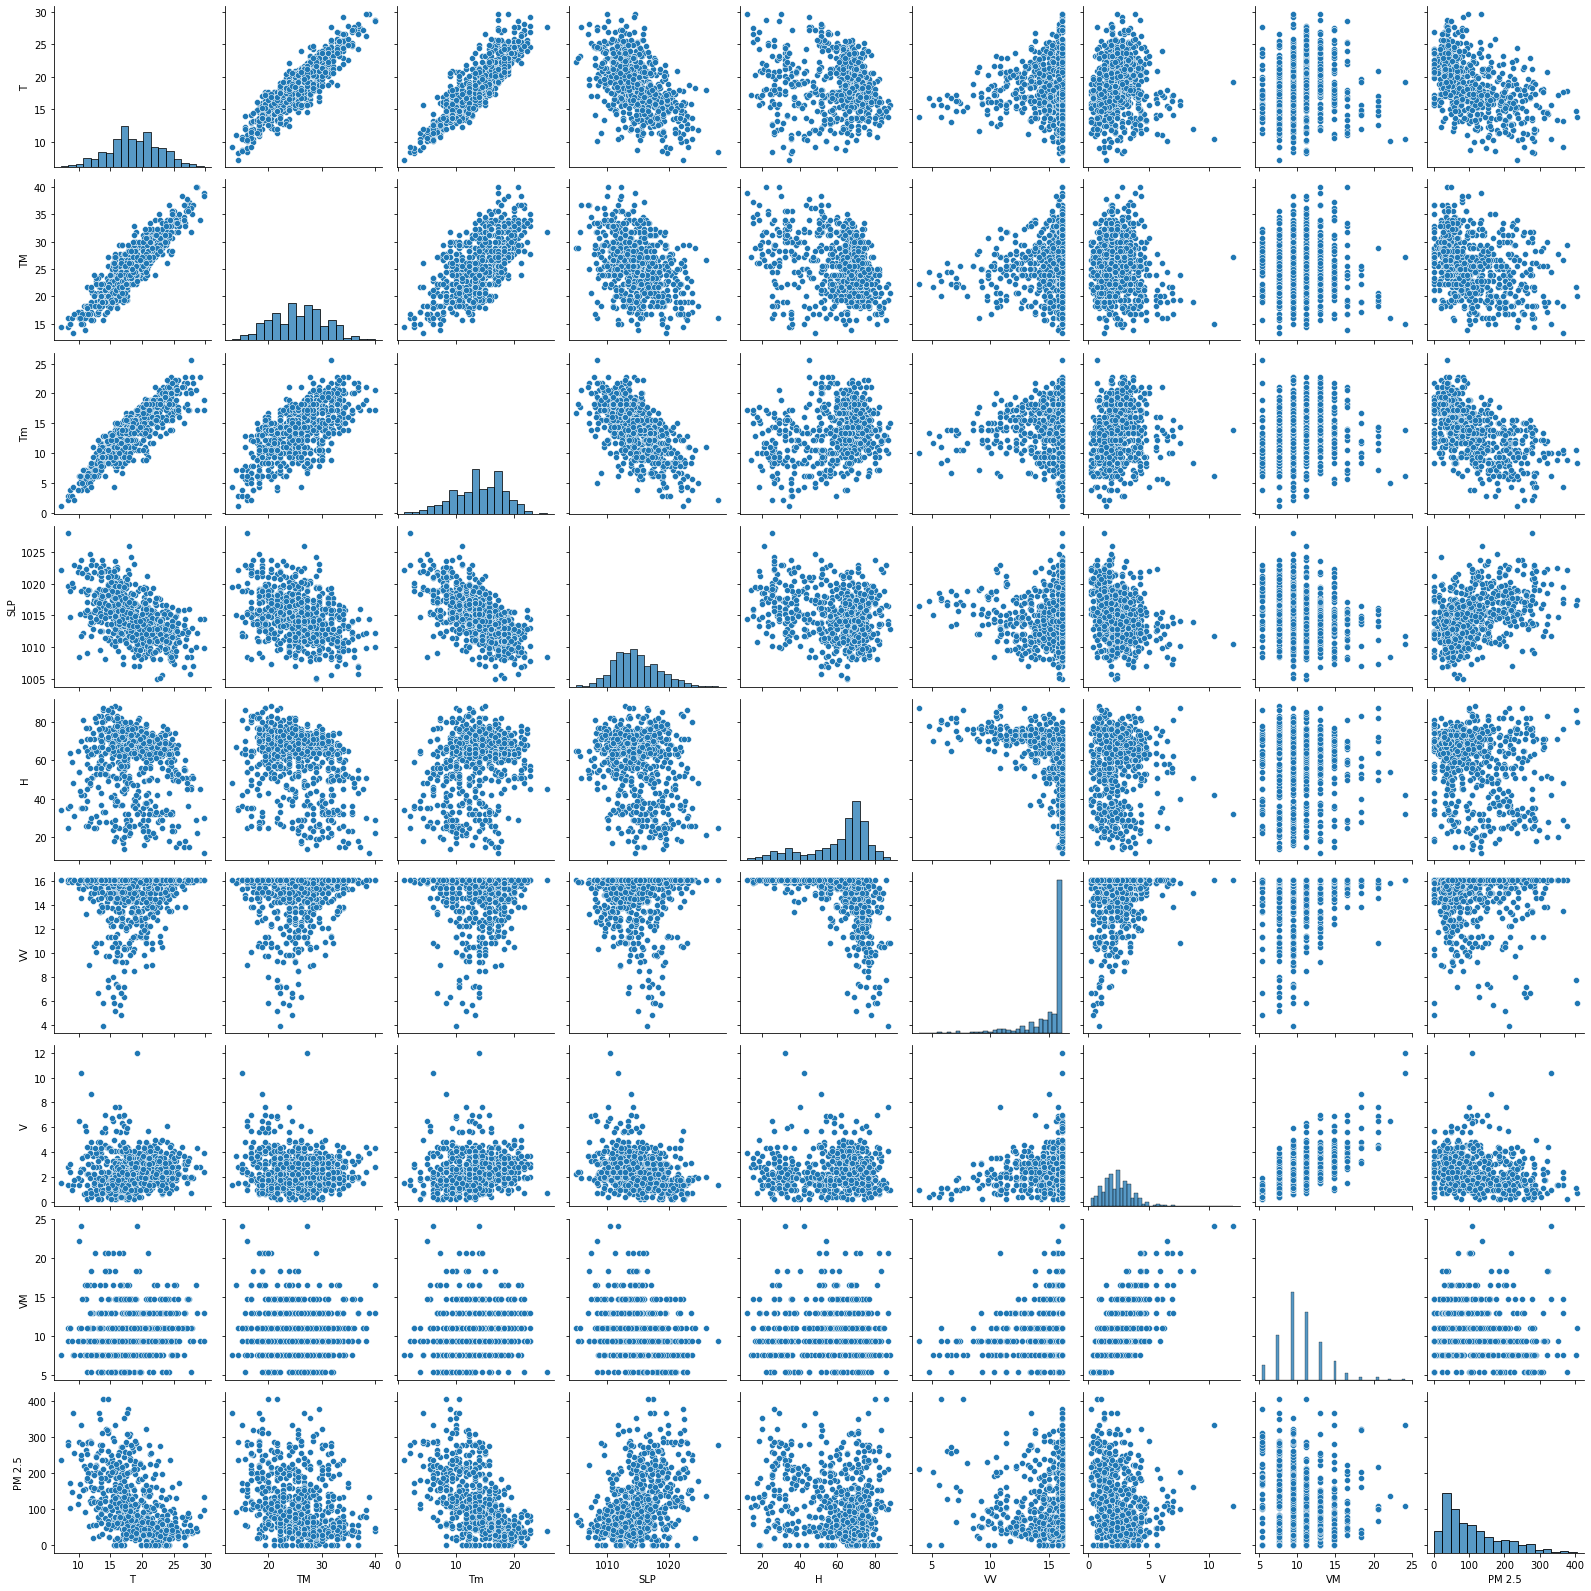

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.900081,0.876524,-0.549777,-0.081398,0.142848,0.028671,0.027816,-0.515390
TM,0.900081,1.000000,0.645256,-0.382821,-0.305583,0.127342,-0.116919,-0.056124,-0.345801
Tm,0.876524,0.645256,1.000000,-0.652724,0.302202,0.026929,0.124955,0.087465,-0.604467
SLP,-0.549777,-0.382821,-0.652724,1.000000,-0.270242,-0.033435,-0.276780,-0.204326,0.432470
H,-0.081398,-0.305583,0.302202,-0.270242,1.000000,-0.444750,0.016323,0.028521,-0.241039
VV,0.142848,0.127342,0.026929,-0.033435,-0.444750,1.000000,0.214965,0.159880,-0.043301
V,0.028671,-0.116919,0.124955,-0.276780,0.016323,0.214965,1.000000,0.679723,-0.198258
VM,0.027816,-0.056124,0.087465,-0.204326,0.028521,0.159880,0.679723,1.000000,-0.130634
PM 2.5,-0.515390,-0.345801,-0.604467,0.432470,-0.241039,-0.043301,-0.198258,-0.130634,1.000000


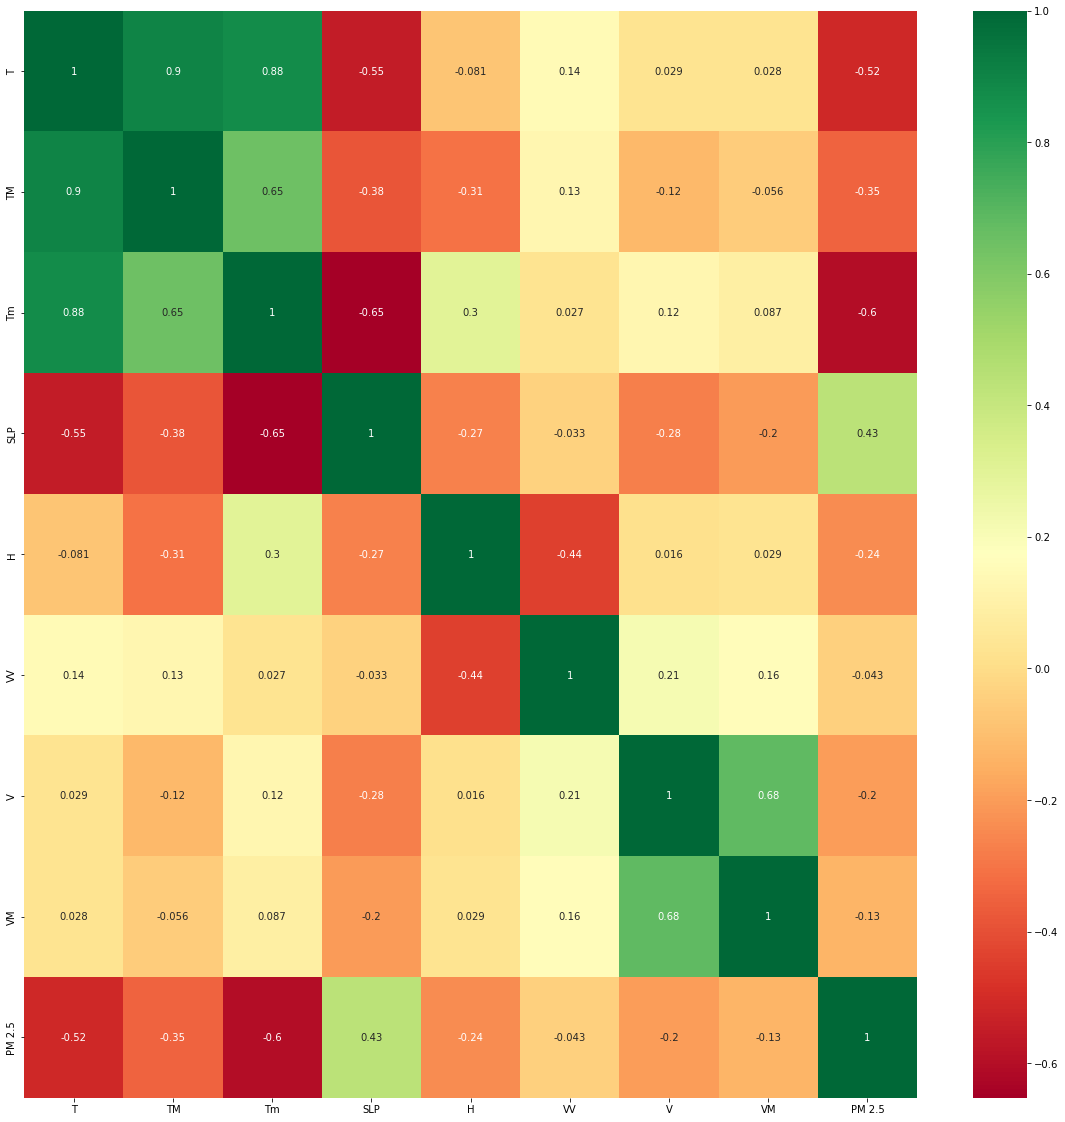

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,10.1,16.1,6.1,1022.7,54.0,15.4,1.3,11.1
1,10.9,18.3,4.4,1019.2,42.0,16.1,0.6,7.6
2,11.3,21.7,3.9,1018.4,39.0,16.1,0.2,5.4
3,12.3,20.6,6.7,1016.9,52.0,16.1,2.2,13.0
4,12.7,22.8,6.1,1017.2,53.0,16.1,0.9,7.6


In [15]:
print(model.feature_importances_)

[0.16544952 0.09295467 0.28012349 0.10639901 0.10357045 0.07031334
 0.10871172 0.0724778 ]


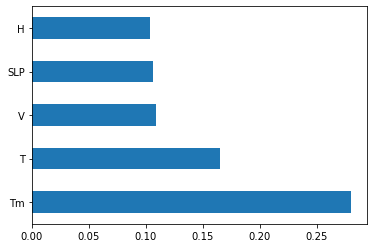

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

D:\Software_Location\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

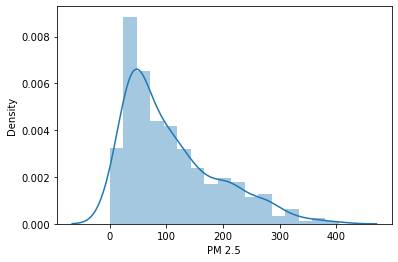

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9153447168615713


In [22]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.33710091114865703


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [24]:
score.mean()

0.20031725856780458

#### Model Evaluation

In [25]:
prediction=regressor.predict(X_test)

D:\Software_Location\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

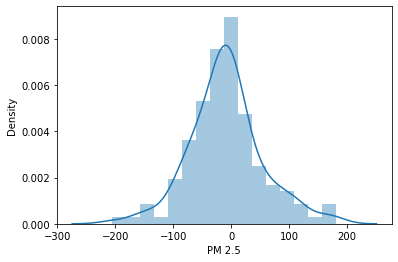

In [26]:
sns.distplot(y_test-prediction)

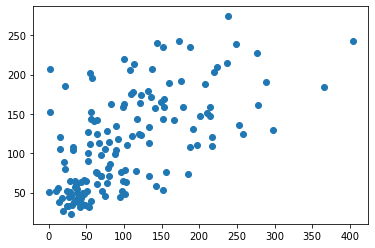

In [27]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [28]:
RandomForestRegressor()

RandomForestRegressor()

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]


In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [34]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=500, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=800, min_samples_spl

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   1.0s
[CV] n_estimators=1100, min_samples_split=100, min_s

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
import pickle 

In [ ]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)